In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

In [2]:
#To load audio file
y, sr = librosa.load("auds/speech.wav",8000)

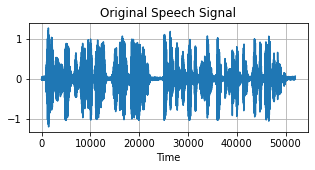

In [3]:
#Plotting original speech signal
plt.figure(figsize=(5,2))
plt.title('Original Speech Signal')
plt.plot(y,label="original file") 
plt.xlabel("Time") 
plt.grid(True)

In [4]:
def plot_spectrogram(signal,hop_length,win_length,title=None,ax=None):
    n_fft = 1024
    D = np.abs(librosa.stft(
        y,
        n_fft,
        hop_length,
        win_length,
        window='hamming'
    )) 
    S_Db =librosa.amplitude_to_db(D, ref=np.max) 
    colormesh=librosa.display.specshow(S_Db,sr=sr,x_axis='s', y_axis='linear',ax=ax)
    ax.set(title=title)
    return colormesh

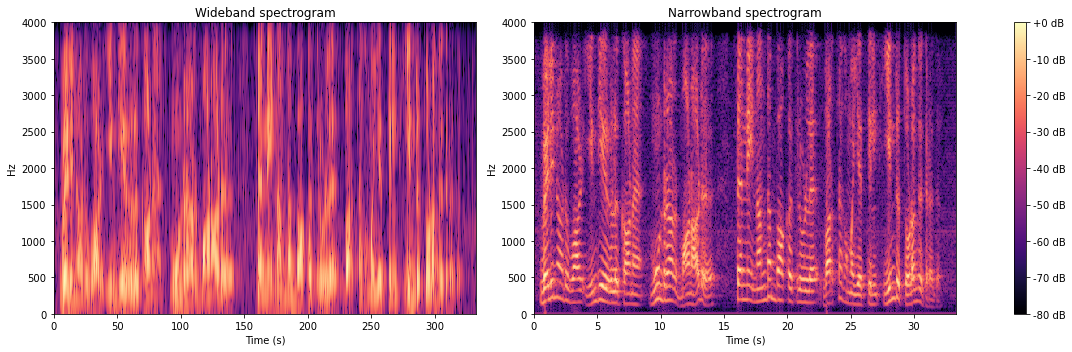

In [5]:
fig,ax = plt.subplots(1,3,figsize=(15,5),gridspec_kw={"width_ratios":[7,7,.2]})
plot_spectrogram(y,10,40,title='Wideband spectrogram',ax= ax[0])
colormesh = plot_spectrogram(y,100,400,title='Narrowband spectrogram',ax= ax[1])
fig.colorbar(colormesh,cax=ax[2], format="%+2.f dB")
plt.tight_layout()